# Método de Hückel

El método de Hückel fue propuesto por Erich Hückel en 1930 y permite modelar de una forma muy aproximada a sistemas $\pi$ conjugados, el cual establece un Hamiltoniano para los electrones $\pi$.

```{admonition} Descripción del Hamiltoniano de electrones $\pi$
:class: dropdown
$$
H_\pi = \sum_{i=1}^{n_\pi}h^{\rm eff}(i)
$$

donde a $h^{\rm eff}(i)$ se le conoce como Hamiltoniano efectivo, y representa las interacciones promediadas del i-ésimo electrón $\pi$ con los núcleos y los otros electrones. Se debe cumplir la ecuación

$$
h^{\rm eff}(i) \phi_i = \varepsilon_i \phi_i
$$

donde $\phi_i$ son los orbitales moleculares de Hückel. Aplicaremos la combinación lineal de orbitales atómicos

$$
\phi_i(\vec{r}) = \sum_{\mu} C_{\mu i} \, \mu (\vec{r}-\vec{r}_i)
$$

donde $ \mu (\vec{r}-\vec{r}_i)$ es un orbital atómico $\mu$ centrado en la posición del núcleo $i$ ($\vec{r}_i$).

```

Determinaremos los coeficientes que minimicen la energía, resolviendo la ecuación del método variacional lineal

$$
H_{\pi}C = SC\varepsilon
$$

**Importe las siguientes librerías**

- numpy
- sympy
- pyplot de matplotlib

In [1]:
# Librerías

In [2]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

El método de Hückel implica las siguientes aproximaciones

1. El traslape entre el mismo orbital es uno, y entre orbitales distintos es cero.
2. Los elementos diagonales, $h^{\rm eff}_{ii}$ valen $\alpha$
3. Los elementos $h^{\rm eff}_{ij}$ valen $\beta$ si el i-ésimo átomo y el j-ésimo átomo son vecinos, y cero si no lo son.

El valor de $\alpha$ y $\beta$ es negativo.

## Butadieno

<img src="images/butadieno.png" alt="butadieno" width="150"/>

Considere al butadieno con la numeración que se muestra sobre cada carbono.

**Defina los símbolos $\alpha$ y $\beta$ con sympy.**

In [3]:
# Defina alpha y beta

In [4]:
alpha = sp.Symbol("alpha")
beta = sp.Symbol("beta")

**Construya la matriz S de $4 \times 4$, donde cada columna y cada renglón corresponde a un renglón según su numeración.** Por ejemplo, la primera columna corresponde al carbono con el número 1, la segunda columna al carbono con el número 2, etc. Recuerde que

$$
S_{ij} = \left\{
  \begin{array}{lll}
  1 & \mathrm{si\ } i=j \\
  0 & \mathrm{si\ } i \neq j
  \end{array}
  \right.
$$

Note que $S$ es la matriz identidad.

In [5]:
S = sp.zeros(4)

S[0,0] = 1
S[1,1] = 1
S[2,2] = 1
S[3,3] = 1

S

Matrix([
[1, 0, 0, 0],
[0, 1, 0, 0],
[0, 0, 1, 0],
[0, 0, 0, 1]])

**Construya la matriz $H$ de $4 \times 4$, donde cada columna y cada renglón corresponde a un renglón según su numeración.** Por ejemplo, la primera columna corresponde al carbono con el número 1, la segunda columna al carbono con el número 2, etc. Recuerde que

$$
H_{ij} = \left\{
  \begin{array}{lll}
  \alpha & \mathrm{si\ } i=j \\
  \beta & \mathrm{si\ } i \neq j \mathrm{\ pero\ pertenecen\ a\ átomos\ vecinos}\\
  0 & \mathrm{si\ } i \neq j \mathrm{\ pero\ NO \ pertenecen\ a\ átomos\ vecinos}\\
  \end{array}
  \right.
$$

In [6]:
# Matriz H

In [7]:
H = sp.zeros(4)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha

H[0,1] = beta
H[1,0] = beta
H[1,2] = beta
H[2,1] = beta
H[2,3] = beta
H[3,2] = beta

H

Matrix([
[alpha,  beta,     0,     0],
[ beta, alpha,  beta,     0],
[    0,  beta, alpha,  beta],
[    0,     0,  beta, alpha]])

Hay que resolver

$$
HC = SC\varepsilon
$$

Note que como $S$ es la matriz identidad, en realidad hay que resolver

$$
HC = C\varepsilon
$$

es decir, hay que calcular los vectores y valores propios de $H$.

Para ello utilizaremos la instrucción
~~~python
H.eigenvects(simplify=True)
~~~

El primer número es el valor propio (energía orbital), el segundo número su repetición (degeneración) y el tercer número son los coeficientes no normalizados (orbital molecular).

In [8]:
# Valores y vectores propios de H

In [9]:
sp.pprint(H.eigenvects(simplify=True))

⎡⎛                 ⎡⎡   -1   ⎤⎤⎞  ⎛                 ⎡⎡  1   ⎤⎤⎞  ⎛                 ⎡⎡   -1   ⎤⎤⎞  ⎛                 ⎡⎡  1   ⎤⎤⎞⎤
⎢⎜                 ⎢⎢        ⎥⎥⎟  ⎜                 ⎢⎢      ⎥⎥⎟  ⎜                 ⎢⎢        ⎥⎥⎟  ⎜                 ⎢⎢      ⎥⎥⎟⎥
⎢⎜                 ⎢⎢ 1   √5 ⎥⎥⎟  ⎜                 ⎢⎢1   √5⎥⎥⎟  ⎜                 ⎢⎢ 1   √5 ⎥⎥⎟  ⎜                 ⎢⎢1   √5⎥⎥⎟⎥
⎢⎜                 ⎢⎢ ─ - ── ⎥⎥⎟  ⎜                 ⎢⎢─ + ──⎥⎥⎟  ⎜                 ⎢⎢ ─ + ── ⎥⎥⎟  ⎜                 ⎢⎢─ - ──⎥⎥⎟⎥
⎢⎜    β   √5⋅β     ⎢⎢ 2   2  ⎥⎥⎟  ⎜    β   √5⋅β     ⎢⎢2   2 ⎥⎥⎟  ⎜    √5⋅β   β     ⎢⎢ 2   2  ⎥⎥⎟  ⎜    √5⋅β   β     ⎢⎢2   2 ⎥⎥⎟⎥
⎢⎜α - ─ + ────, 1, ⎢⎢        ⎥⎥⎟, ⎜α + ─ + ────, 1, ⎢⎢      ⎥⎥⎟, ⎜α - ──── - ─, 1, ⎢⎢        ⎥⎥⎟, ⎜α - ──── + ─, 1, ⎢⎢      ⎥⎥⎟⎥
⎢⎜    2    2       ⎢⎢  1   √5⎥⎥⎟  ⎜    2    2       ⎢⎢1   √5⎥⎥⎟  ⎜     2     2     ⎢⎢  √5   1⎥⎥⎟  ⎜     2     2     ⎢⎢1   √5⎥⎥⎟⎥
⎢⎜                 ⎢⎢- ─ + ──⎥⎥⎟  ⎜                 ⎢⎢─ + ──⎥⎥⎟  ⎜                 ⎢⎢- ── - ─⎥⎥⎟ 

**Extra**. Dibuje a mano una representación esquemática del diagrama de orbitales moleculares según las energías que obtuvo. Las energías son

$$\varepsilon_1 = \alpha + \left(\frac{1+\sqrt{5}}{2} \right)\beta$$
$$\varepsilon_2 = \alpha + \left(\frac{-1+\sqrt{5}}{2} \right)\beta$$
$$\varepsilon_3 = \alpha + \left(\frac{1-\sqrt{5}}{2} \right)\beta$$
$$\varepsilon_4 = \alpha + \left(\frac{-1-\sqrt{5}}{2} \right)\beta$$

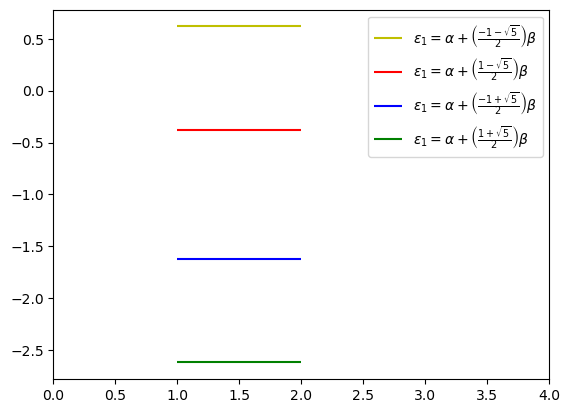

In [10]:
alpha = -1
beta = -1

plt.hlines(alpha + (-1-np.sqrt(5))/2*beta,1,2,label=r'$\varepsilon_1 = \alpha + \left(\frac{-1-\sqrt{5}}{2}\right)\beta$',colors='y')
plt.hlines(alpha + (1-np.sqrt(5))/2*beta,1,2,label=r'$\varepsilon_1 = \alpha + \left(\frac{1-\sqrt{5}}{2}\right)\beta$',colors='r')
plt.hlines(alpha + (-1+np.sqrt(5))/2*beta,1,2,label=r'$\varepsilon_1 = \alpha + \left(\frac{-1+\sqrt{5}}{2}\right)\beta$',colors='b')
plt.hlines(alpha + (1+np.sqrt(5))/2*beta,1,2,label=r'$\varepsilon_1 = \alpha + \left(\frac{1+\sqrt{5}}{2}\right)\beta$',colors='g')

plt.xlim(0,4)
plt.legend()
plt.show()

## Benceno

<img src="images/benceno.png" alt="benceno" width="150"/>

Considere al benceno con la numeración que se muestra sobre cada carbono.

**Defina los símbolos $\alpha$ y $\beta$ con sympy.**

In [11]:
# Defina alpha y beta

In [12]:
alpha = sp.Symbol("alpha")
beta = sp.Symbol("beta")

**Construya la matriz S de $6 \times 6$, donde cada columna y cada renglón corresponde a un renglón según su numeración.**

$$
S_{ij} = \left\{
  \begin{array}{lll}
  1 & \mathrm{si\ } i=j \\
  0 & \mathrm{si\ } i \neq j
  \end{array}
  \right.
$$

In [13]:
S = sp.zeros(6)

S[0,0] = 1
S[1,1] = 1
S[2,2] = 1
S[3,3] = 1
S[4,4] = 1
S[5,5] = 1

S

Matrix([
[1, 0, 0, 0, 0, 0],
[0, 1, 0, 0, 0, 0],
[0, 0, 1, 0, 0, 0],
[0, 0, 0, 1, 0, 0],
[0, 0, 0, 0, 1, 0],
[0, 0, 0, 0, 0, 1]])

**Construya la matriz $H$ de $4 \times 4$, donde cada columna y cada renglón corresponde a un renglón según su numeración.** Por ejemplo, la primera columna corresponde al carbono con el número 1, la segunda columna al carbono con el número 2, etc. Recuerde que

$$
H_{ij} = \left\{
  \begin{array}{lll}
  \alpha & \mathrm{si\ } i=j \\
  \beta & \mathrm{si\ } i \neq j \mathrm{\ pero\ pertenecen\ a\ átomos\ vecinos}\\
  0 & \mathrm{si\ } i \neq j \mathrm{\ pero\ NO \ pertenecen\ a\ átomos\ vecinos}\\
  \end{array}
  \right.
$$

In [14]:
# Matriz H

In [15]:
H = sp.zeros(6)

H[0,0] = alpha
H[1,1] = alpha
H[2,2] = alpha
H[3,3] = alpha
H[4,4] = alpha
H[5,5] = alpha

H[0,1] = beta
H[0,5] = beta
H[1,0] = beta
H[1,2] = beta
H[2,1] = beta
H[2,3] = beta
H[3,2] = beta
H[3,4] = beta
H[4,3] = beta
H[4,5] = beta
H[5,4] = beta
H[5,0] = beta

H

Matrix([
[alpha,  beta,     0,     0,     0,  beta],
[ beta, alpha,  beta,     0,     0,     0],
[    0,  beta, alpha,  beta,     0,     0],
[    0,     0,  beta, alpha,  beta,     0],
[    0,     0,     0,  beta, alpha,  beta],
[ beta,     0,     0,     0,  beta, alpha]])

Note que $H$ en benceno es similar, pero no igual al caso del butadieno.

Hay que resolver

$$
HC = SC\varepsilon
$$

Note que como $S$ es la matriz identidad, en realidad hay que resolver

$$
HC = C\varepsilon
$$

In [16]:
# Valores y vectores propios de H

In [17]:
sp.pprint(H.eigenvects(simplify=True))

⎡⎛            ⎡⎡-1⎤⎤⎞  ⎛          ⎡⎡-1⎤  ⎡-1⎤⎤⎞  ⎛          ⎡⎡-1⎤  ⎡1 ⎤⎤⎞  ⎛            ⎡⎡1⎤⎤⎞⎤
⎢⎜            ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜            ⎢⎢ ⎥⎥⎟⎥
⎢⎜            ⎢⎢1 ⎥⎥⎟  ⎜          ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜          ⎢⎢-1⎥  ⎢0 ⎥⎥⎟  ⎜            ⎢⎢1⎥⎥⎟⎥
⎢⎜            ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜            ⎢⎢ ⎥⎥⎟⎥
⎢⎜            ⎢⎢-1⎥⎥⎟  ⎜          ⎢⎢0 ⎥  ⎢1 ⎥⎥⎟  ⎜          ⎢⎢0 ⎥  ⎢-1⎥⎥⎟  ⎜            ⎢⎢1⎥⎥⎟⎥
⎢⎜α - 2⋅β, 1, ⎢⎢  ⎥⎥⎟, ⎜α - β, 2, ⎢⎢  ⎥, ⎢  ⎥⎥⎟, ⎜α + β, 2, ⎢⎢  ⎥, ⎢  ⎥⎥⎟, ⎜α + 2⋅β, 1, ⎢⎢ ⎥⎥⎟⎥
⎢⎜            ⎢⎢1 ⎥⎥⎟  ⎜          ⎢⎢-1⎥  ⎢-1⎥⎥⎟  ⎜          ⎢⎢1 ⎥  ⎢-1⎥⎥⎟  ⎜            ⎢⎢1⎥⎥⎟⎥
⎢⎜            ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜            ⎢⎢ ⎥⎥⎟⎥
⎢⎜            ⎢⎢-1⎥⎥⎟  ⎜          ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜          ⎢⎢1 ⎥  ⎢0 ⎥⎥⎟  ⎜            ⎢⎢1⎥⎥⎟⎥
⎢⎜            ⎢⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜          ⎢⎢  ⎥  ⎢  ⎥⎥⎟  ⎜            ⎢⎢ ⎥⎥⎟⎥
⎣⎝            ⎣⎣1 ⎦⎦⎠  ⎝          ⎣⎣0 ⎦ 

**Extra**. Dibuje una representación esquemática del diagrama de orbitales moleculares según las energías que obtuvo. Las energías son

$$\varepsilon_1 = \alpha - 2\beta$$
$$\varepsilon_2 = \alpha - \beta$$
$$\varepsilon_3 = \alpha - \beta$$
$$\varepsilon_4 = \alpha + \beta$$
$$\varepsilon_5 = \alpha + \beta$$
$$\varepsilon_6 = \alpha + 2\beta$$

Note que hay degeneración.

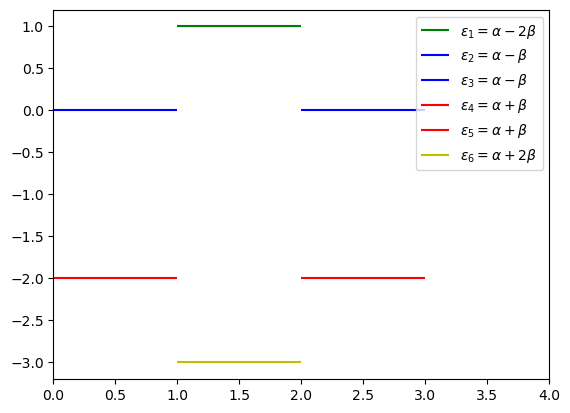

In [18]:
alpha = -1
beta = -1

plt.hlines(alpha - 2*beta,1,2,label=r'$\varepsilon_1 = \alpha - 2\beta$',colors='g')
plt.hlines(alpha - beta,0,1,label=r'$\varepsilon_2 = \alpha - \beta$',colors='b')
plt.hlines(alpha - beta,2,3,label=r'$\varepsilon_3 = \alpha - \beta$',colors='b')
plt.hlines(alpha + beta,0,1,label=r'$\varepsilon_4 = \alpha + \beta$',colors='r')
plt.hlines(alpha + beta,2,3,label=r'$\varepsilon_5 = \alpha + \beta$',colors='r')
plt.hlines(alpha + 2*beta,1,2,label=r'$\varepsilon_6  = \alpha + 2\beta$',colors='y')

plt.xlim(0,4)
plt.legend()
plt.show()

<img src="images/benceno-hmo1.png" alt="benceno-hmo1" width="100"/>

<img src="images/benceno-hmo2.png" alt="benceno-hmo2" width="120"/>

<img src="images/benceno-hmo3.png" alt="benceno-hmo3" width="80"/>

<img src="images/benceno-hmo4.png" alt="benceno-hmo4" width="120"/>

<img src="images/benceno-hmo5.png" alt="benceno-hmo5" width="80"/>

<img src="images/benceno-hmo6.png" alt="benceno-hmo6" width="120"/>

## Referencias

- E.F. Healy, Huckel Calculations using Mathematica, J. Chem. Educ. 72, A120 (1995).
- R.M. Hanson, Huckel Determinant Solver, J. Chem. Educ. 79, 1379 (2002).
- L.J. Schaad y B.A. Hess, Huckel theory and aromatically, J. Chem. Educ. 51, 640 (1974).
- Z. Chen, Graphical Representation of Hückel Molecular Orbitals, J. Chem. Educ. 97, 448 (2020).
- P. W. Atkins, y R. Friedman, Molecular Quantum Mechanics (Oxford University Press, 2005).